# Data-Driven Oil Well Selection: Profitability and Risk Assessment for OilyGiant

# Introduction

In this project for OilyGiant, I aim to determine the best location for developing a new oil well by analyzing geological data from three regions. Using a linear regression model, I predict the volume of oil reserves and select the top 200 wells in each region to estimate potential profits. The project considers key business constraints, including a 100 million dollar budget and $4.5 thousand revenue per barrel. The profitability and risks are assessed using the bootstrapping technique, with a focus on minimizing the risk of losses to below 2.5%. Based on the analysis, I will recommend the most profitable and least risky region for oil well development.


This code cell imports the necessary libraries for the project, including pandas and numpy for data manipulation, scikit-learn for model training and evaluation, matplotlib for plotting, and scipy for statistical calculations such as bootstrapping. These tools will be used for data preprocessing, linear regression modeling, performance evaluation, and risk analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

This code cell loads the geological data for three regions and checks for missing values and duplicate rows. It confirms that all datasets have 100,000 entries with no missing values. The check also identifies 10 duplicate IDs in Region 0, and 4 duplicates each in Regions 1 and 2. The cell concludes by printing the first few rows of each dataset, offering an overview of the oil well parameters and reserve volumes across the three regions.

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

def check_data(df, region_name):
    print(f"\nRegion {region_name} Data Overview:")
    print(df.info())  
    print("\nMissing Values:")
    print(df.isnull().sum()) 
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())  
    print("\nFirst few rows of the dataset:")
    print(df.head())  


check_data(data_0, "0")
check_data(data_1, "1")
check_data(data_2, "2")

print()

print(f"Region 0 Duplicate IDs: {data_0['id'].duplicated().sum()}")
print(f"Region 1 Duplicate IDs: {data_1['id'].duplicated().sum()}")
print(f"Region 2 Duplicate IDs: {data_2['id'].duplicated().sum()}")

# Dropping duplicate IDs
data_0_clean = data_0.drop_duplicates(subset='id')
data_1_clean = data_1.drop_duplicates(subset='id')
data_2_clean = data_2.drop_duplicates(subset='id')

# Checking if duplicates were successfully removed
def check_duplicates(df, region_name):
    print(f"\nAfter Dropping Duplicates - Region {region_name}:")
    print(f"Duplicate IDs: {df['id'].duplicated().sum()}")

check_duplicates(data_0_clean, "0")
check_duplicates(data_1_clean, "1")
check_duplicates(data_2_clean, "2")



Region 0 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Missing Values:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Duplicate Rows:
0

First few rows of the dataset:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Region 1 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 en

In [3]:
# Reviewer's code 3

pd.read_csv('/datasets/geo_data_0.csv')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


This cell includes histograms and box plots to visualize the distributions and outliers for each feature (f0, f1, f2, and product) in the datasets for all three regions. The histograms provide insight into the frequency distribution of each feature, while the box plots highlight the presence of outliers and the spread of data. These visualizations help identify potential data issues, patterns, and anomalies within the regions.

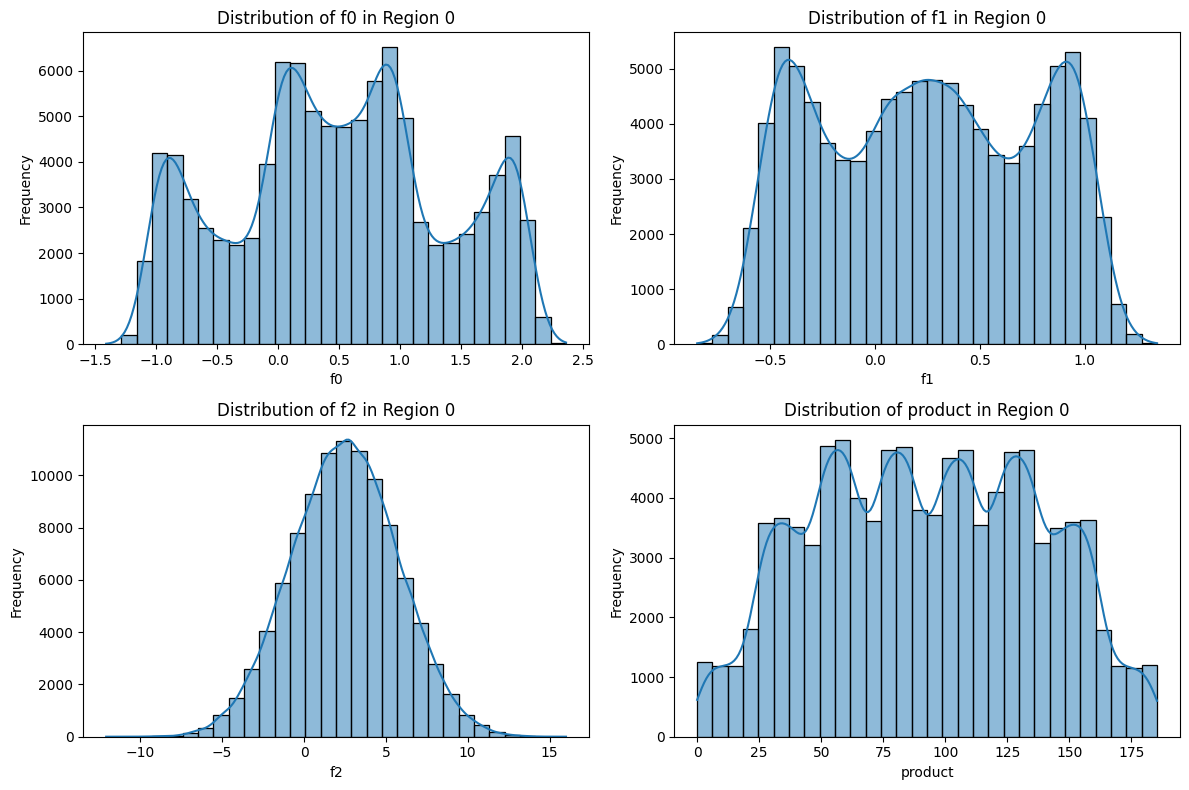

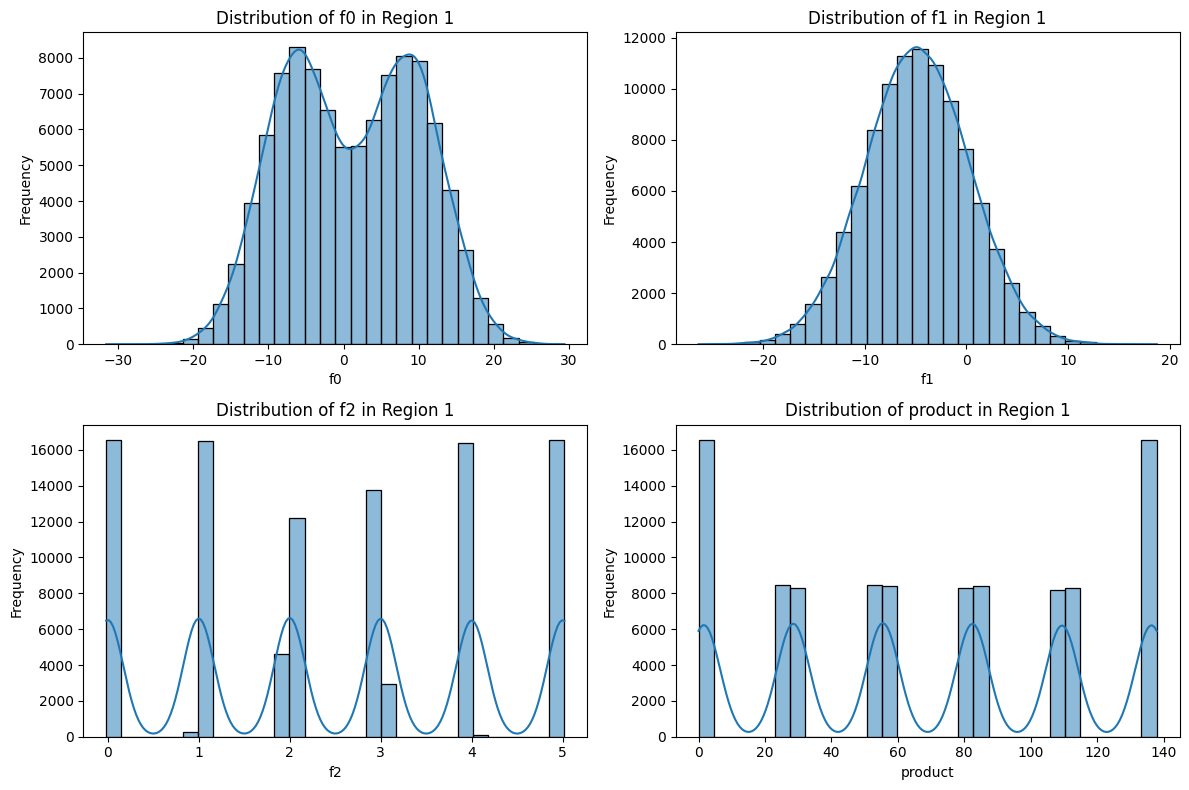

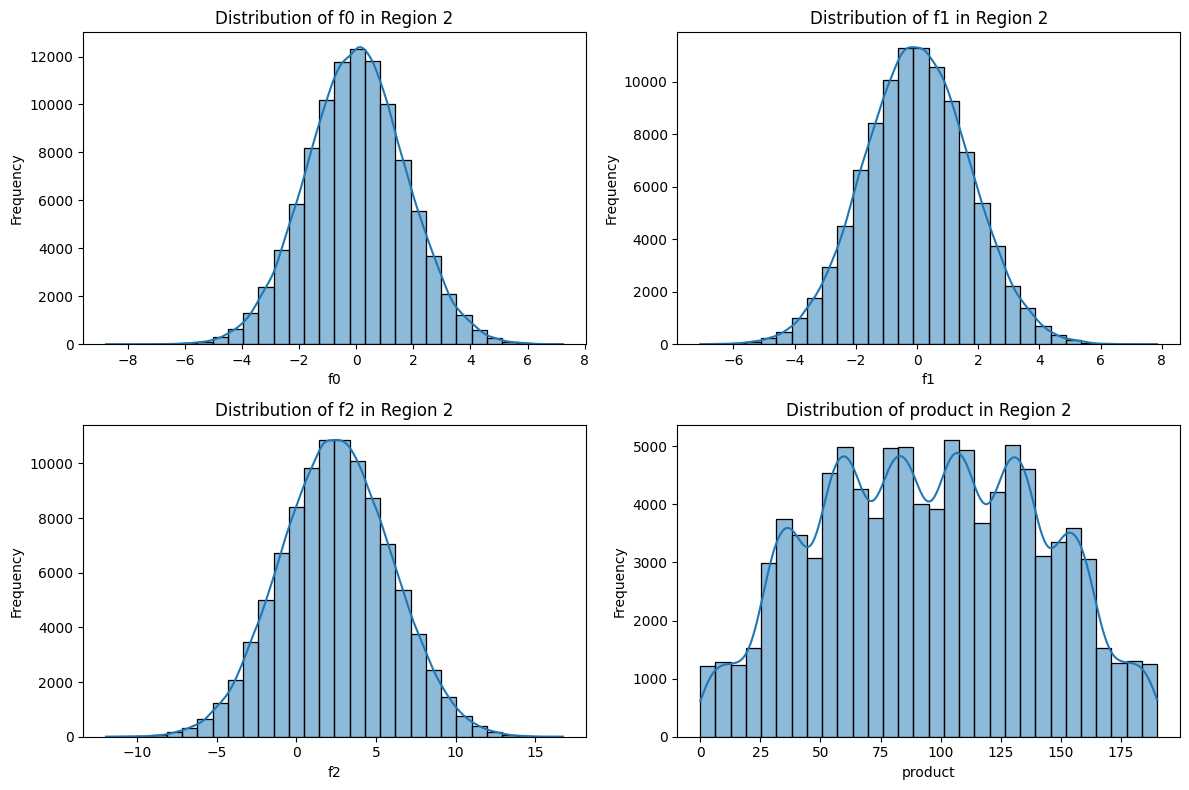

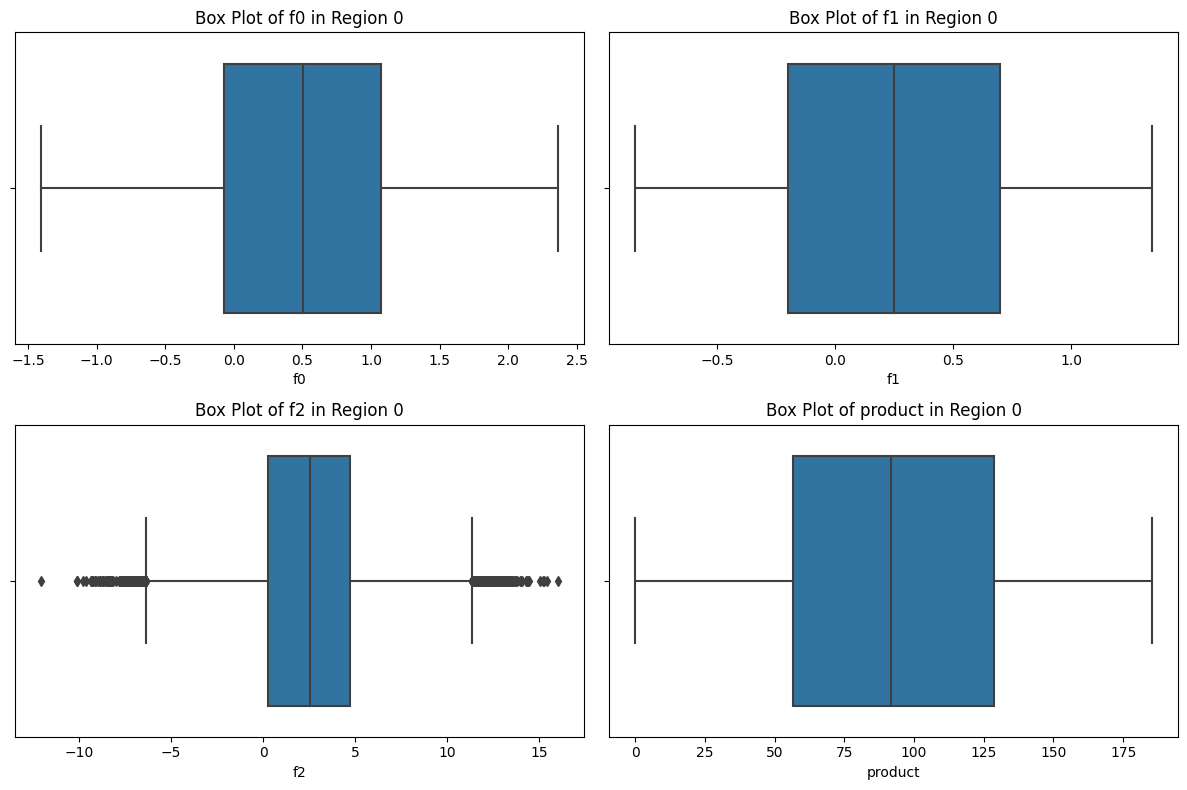

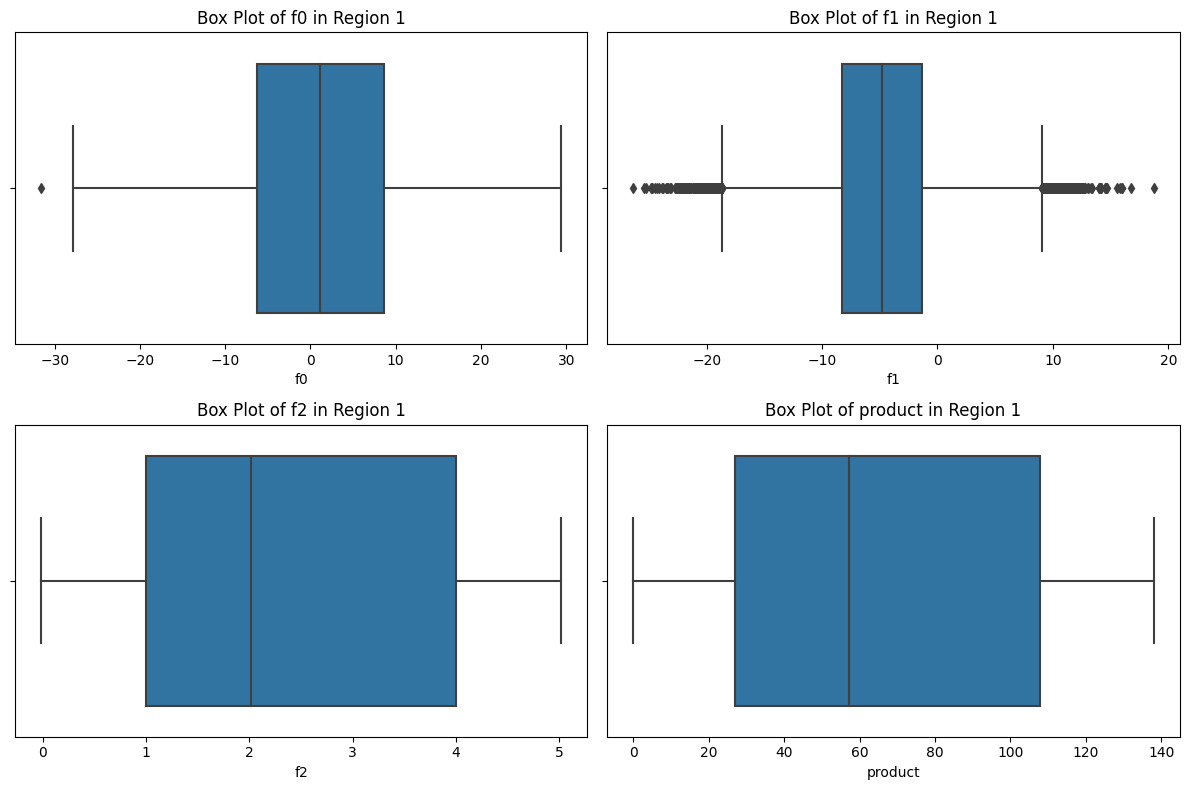

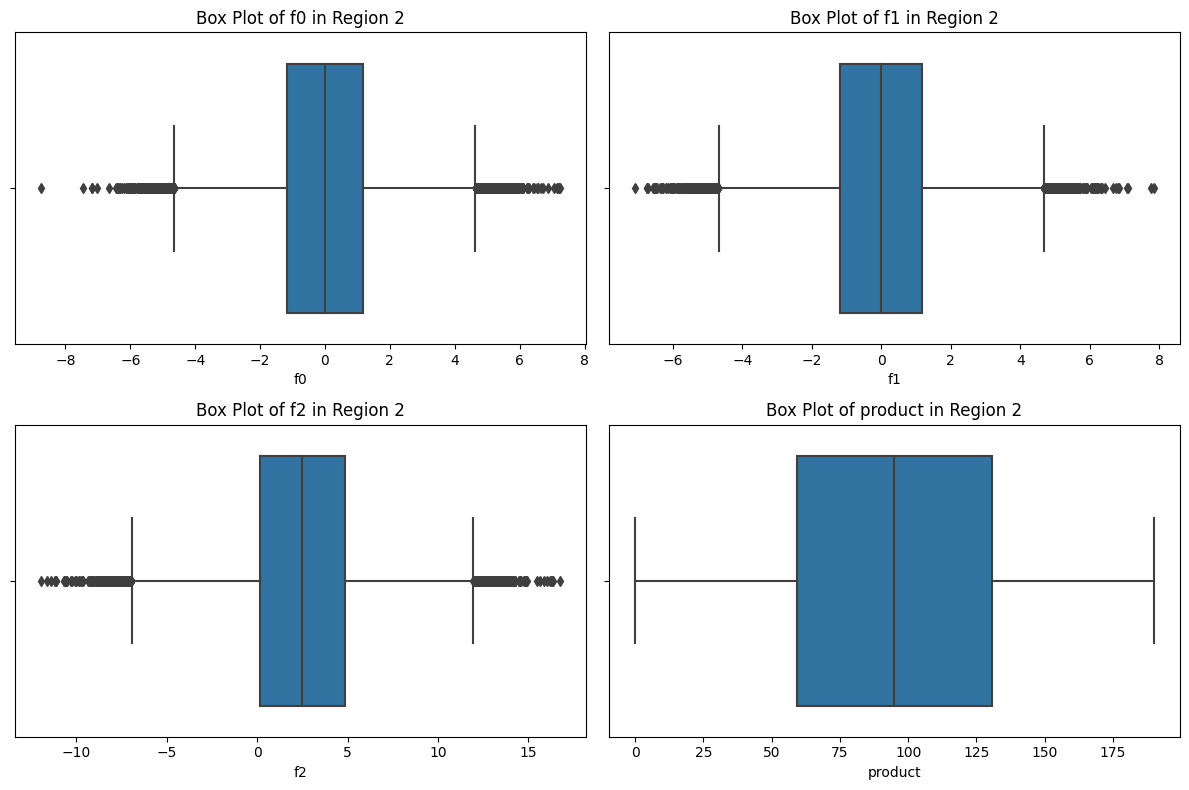

In [4]:

def plot_distributions(data, region_name):
    plt.figure(figsize=(12, 8))
    
   
    for i, column in enumerate(['f0', 'f1', 'f2', 'product']):
        plt.subplot(2, 2, i+1)
        sns.histplot(data[column], kde=True, bins=30)  
        plt.title(f'Distribution of {column} in Region {region_name}')  # Title for each plot
        plt.xlabel(column)  
        plt.ylabel('Frequency')  
    
    plt.tight_layout()  
    plt.show()


plot_distributions(data_0, "0")
plot_distributions(data_1, "1")
plot_distributions(data_2, "2")


def plot_boxplots(data, region_name):
    plt.figure(figsize=(12, 8))
    
    
    for i, column in enumerate(['f0', 'f1', 'f2', 'product']):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column} in Region {region_name}')  
        plt.xlabel(column)  
    
    plt.tight_layout()  
    plt.show()

plot_boxplots(data_0, "0")
plot_boxplots(data_1, "1")
plot_boxplots(data_2, "2")

The distributions and box plots for features f0, f1, f2, and product reveal distinct patterns across the three regions. Region 2 shows more symmetrical and normally distributed features, suggesting consistency and stability in this region. In contrast, Regions 0 and 1 exhibit multimodal distributions, especially in f0 and f1, with more pronounced outliers, indicating potential segmentation or variability within these regions. The product values display peaks in all regions, but Region 1 has more distinct spikes, implying repeated production values. Overall, Region 2 is more uniform, while Regions 0 and 1 demonstrate more complexity, which could influence how features are handled in modeling.

This function trains a linear regression model to predict oil reserves based on three features (f0, f1, f2). The data is split into training (75%) and validation (25%) sets, and the features are scaled before training. The results show that Region 0 has the highest average predicted reserves (92.40 thousand barrels) but also a higher error (RMSE: 37.76 thousand barrels), while Region 1 has the lowest error (RMSE: 0.89 thousand barrels). Region 2 has similar predicted reserves to Region 0 but with higher error variability (RMSE: 40.15 thousand barrels).

In [5]:
def train_and_evaluate_model(data, region_name):
    X = data[['f0', 'f1', 'f2']]  
    y = data['product']  
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    
    model = LinearRegression()
    
    model.fit(X_train_scaled, y_train)
    
    predictions = model.predict(X_valid_scaled)
    
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    
    
    print(f"\nRegion {region_name} Results:")
    print(f"Average predicted reserves: {predictions.mean():.2f} thousand barrels")
    print(f"RMSE: {rmse:.2f} thousand barrels")
    
    return predictions, y_valid

predictions_0, y_valid_0 = train_and_evaluate_model(data_0, "0")
predictions_1, y_valid_1 = train_and_evaluate_model(data_1, "1")
predictions_2, y_valid_2 = train_and_evaluate_model(data_2, "2")




Region 0 Results:
Average predicted reserves: 92.40 thousand barrels
RMSE: 37.76 thousand barrels

Region 1 Results:
Average predicted reserves: 68.71 thousand barrels
RMSE: 0.89 thousand barrels

Region 2 Results:
Average predicted reserves: 94.77 thousand barrels
RMSE: 40.15 thousand barrels


In this cell, we calculate the break-even volume of reserves required to avoid losses, which is determined to be 111.11 thousand barrels. When comparing this value with the average volume of reserves in each region, all three regions fall short of this threshold, indicating that none of the regions are profitable based on the average reserves.

In [6]:
BUDGET = 100_000_000  
OIL_PRICE_PER_BARREL = 4.5  
WELLS_COUNT = 200  
REVENUE_PER_THOUSAND_BARRELS = OIL_PRICE_PER_BARREL * 1000  


cost_per_well = BUDGET / WELLS_COUNT  
break_even_volume = cost_per_well / REVENUE_PER_THOUSAND_BARRELS  
print(f"\nSufficient volume of reserves for profit without losses: {break_even_volume:.2f} thousand barrels")


def compare_with_avg_volume(data, region_name):
    avg_volume = data['product'].mean()  
    print(f"\nRegion {region_name} - Average Volume: {avg_volume:.2f} thousand barrels")
    if avg_volume > break_even_volume:
        print(f"Region {region_name} is profitable based on the average reserves.\n")
    else:
        print(f"Region {region_name} is not profitable based on the average reserves.\n")


compare_with_avg_volume(data_0, "0")
compare_with_avg_volume(data_1, "1")
compare_with_avg_volume(data_2, "2")



Sufficient volume of reserves for profit without losses: 111.11 thousand barrels

Region 0 - Average Volume: 92.50 thousand barrels
Region 0 is not profitable based on the average reserves.


Region 1 - Average Volume: 68.83 thousand barrels
Region 1 is not profitable based on the average reserves.


Region 2 - Average Volume: 95.00 thousand barrels
Region 2 is not profitable based on the average reserves.



This code selects the top 200 wells with the highest predicted reserves for each region and calculates the total profit using the actual reserves for these wells. The profit results show that Region 0 yields the highest profit (33.59 million USD), followed by Region 2 (25.99 million USD) and Region 1 (24.15 million USD). The use of actual reserves for profit calculation helps correct the potential inaccuracies in predictions.

In [7]:
def calculate_profit(predictions, actual, wells_count):
    predictions = predictions.reset_index(drop=True)
    actual = actual.reset_index(drop=True)
    
    top_well_indices = predictions.sort_values(ascending=False).index[:wells_count]
    
    total_reserves = actual.iloc[top_well_indices].sum()
    
    profit = (total_reserves * REVENUE_PER_THOUSAND_BARRELS) - BUDGET
    
    return profit

profit_0 = calculate_profit(pd.Series(predictions_0), y_valid_0, WELLS_COUNT)
profit_1 = calculate_profit(pd.Series(predictions_1), y_valid_1, WELLS_COUNT)
profit_2 = calculate_profit(pd.Series(predictions_2), y_valid_2, WELLS_COUNT)

print(f"\nProfit for Region 0: {profit_0 / 1e6:.2f} million USD")
print(f"Profit for Region 1: {profit_1 / 1e6:.2f} million USD")
print(f"Profit for Region 2: {profit_2 / 1e6:.2f} million USD")




Profit for Region 0: 33.59 million USD
Profit for Region 1: 24.15 million USD
Profit for Region 2: 25.99 million USD


Bootstrapping to estimate the profit distribution and assess the risk of losses for each region. The results show that Region 1 has the lowest risk of loss (1.5%), followed by Region 0 (6%) and Region 2 (8%). Despite the slight risk of loss, Region 1 and Region 0 show the most promising potential profits, with Region 1 having a higher confidence interval.

In [8]:
def bootstrap_profit(predictions, actual, wells_count, n_samples=1000):
    np.random.seed(42)
    profits = []
    
    predictions = predictions.reset_index(drop=True)
    actual = actual.reset_index(drop=True)
    
    for _ in range(n_samples):
        sampled_indices = actual.sample(n=500, replace=True).index
        
        sampled_predictions = predictions.iloc[sampled_indices]
        sampled_actual = actual.iloc[sampled_indices]
        
        profit = calculate_profit(sampled_predictions, sampled_actual, wells_count)
        profits.append(profit)
    
    profits = np.array(profits)
    
    lower_bound = np.percentile(profits, 2.5)
    upper_bound = np.percentile(profits, 97.5)
    risk_of_loss = (profits < 0).mean() * 100
    
    return profits.mean(), (lower_bound, upper_bound), risk_of_loss

mean_profit_0, conf_interval_0, risk_0 = bootstrap_profit(pd.Series(predictions_0), y_valid_0, WELLS_COUNT)
mean_profit_1, conf_interval_1, risk_1 = bootstrap_profit(pd.Series(predictions_1), y_valid_1, WELLS_COUNT)
mean_profit_2, conf_interval_2, risk_2 = bootstrap_profit(pd.Series(predictions_2), y_valid_2, WELLS_COUNT)

print(f"\nRegion 0: Mean profit: {mean_profit_0 / 1e6:.2f} million USD, Confidence Interval: {conf_interval_0}, Risk of loss: {risk_0:.2f}%")
print(f"Region 1: Mean profit: {mean_profit_1 / 1e6:.2f} million USD, Confidence Interval: {conf_interval_1}, Risk of loss: {risk_1:.2f}%")
print(f"Region 2: Mean profit: {mean_profit_2 / 1e6:.2f} million USD, Confidence Interval: {conf_interval_2}, Risk of loss: {risk_2:.2f}%")



Region 0: Mean profit: 4.00 million USD, Confidence Interval: (-1104678.9533197111, 8974603.27717879), Risk of loss: 6.00%
Region 1: Mean profit: 4.52 million USD, Confidence Interval: (616844.7965422687, 8453401.775073847), Risk of loss: 1.50%
Region 2: Mean profit: 3.75 million USD, Confidence Interval: (-1447667.2730489261, 8883904.035342218), Risk of loss: 8.00%


Based on the bootstrapping results, the code evaluates whether the regions meet the 2.5% risk threshold. Since only Region 1 satisfies this criterion, it is identified as the best region for oil well development based on its low risk and competitive average profit.

In [9]:
if risk_0 < 2.5 and risk_1 < 2.5 and risk_2 < 2.5:
    best_region = np.argmax([mean_profit_0, mean_profit_1, mean_profit_2])
    print(f"\nThe best region for well development is Region {best_region}, with the highest average profit.")
else:
    best_region = np.argmin([risk_0, risk_1, risk_2])
    print(f"\nThe best region for well development is Region {best_region}, which has the lowest risk of losses.")



The best region for well development is Region 1, which has the lowest risk of losses.


# Conclusion

The analysis of the three regions using a linear regression model and bootstrapping technique revealed that Region 1 offers the best opportunity for oil well development, based on a combination of low risk (1.5%) and moderate profit potential (4.52 million USD). While none of the regions exceed the break-even threshold on average, Region 1's combination of relatively lower risk and strong profit margins makes it the optimal choice under the given conditions. Region 0 also presents a viable option, with a reasonable profit margin (33.59 million USD) but a slightly higher risk (6%). Future analysis could focus on improving model accuracy or exploring cost-cutting strategies to increase profitability across all regions. Overall, this project provides valuable insights into predicted oil reserves, potential profits, and associated risks, supporting data-driven decision-making for OilyGiant’s next oil well development.